In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
font = {'size': 16}
matplotlib.rc('font', **font)

In [2]:
basedir = './국토교통부_실거래가_공개시스템/땅값분석/heatmap/'
filenames = [f for f in os.listdir(basedir) if f.endswith('.csv')]
filenames

['아파트(매매)__실거래가_20180101_20181231.csv',
 '아파트(매매)__실거래가_20190101_20191231.csv',
 '아파트(매매)__실거래가_20200101_20201231.csv',
 '아파트(매매)__실거래가_20210101_20210324.csv',
 '연립다세대(매매)__실거래가_20180101_20181231.csv',
 '연립다세대(매매)__실거래가_20190101_20191231.csv',
 '연립다세대(매매)__실거래가_20200101_20201231.csv',
 '연립다세대(매매)__실거래가_20210101_20210324.csv',
 '오피스텔(매매)__실거래가_20180101_20181231.csv',
 '오피스텔(매매)__실거래가_20190101_20191231.csv',
 '오피스텔(매매)__실거래가_20200101_20201231.csv',
 '오피스텔(매매)__실거래가_20210101_20210324.csv']

In [3]:
dfs_list = []
common_cols = ['시군구', '번지', '본번', '부번', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)', '층', '건축년도', '도로명']
for f in tqdm(filenames):
    df = pd.read_csv(basedir + f, header=15, encoding='euc-kr')
    df = df[common_cols]
    if '아파트' in f:
        df['건물종류'] = '아파트'
    elif '연립' in f:
        df['건물종류'] = '연립다세대'
    elif '오피' in f:
        df['건물종류'] = '오피스텔'
    dfs_list.append(df)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 15.36it/s]


In [4]:
concat_df = pd.concat(dfs_list).reset_index(drop=True)

In [5]:
def landnum_modifier(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x)
        splitted = x.split('-')
        if len(splitted) == 1:
            return x + '-0'
        else:
            return x

In [6]:
concat_df['번지'] = concat_df['번지'].apply(landnum_modifier)

In [7]:
coor_df = pd.read_csv('./prepped_data/coor_data_ver_1.csv')
print(coor_df.shape)
coor_df.head()

(546319, 3)


,도로명주소,X좌표,Y좌표
0,서울특별시 종로구 자하문로 94-0,953241.683263,1.954023e+06
1,서울특별시 종로구 자하문로 96-0,953243.258151,1.954034e+06
2,서울특별시 종로구 자하문로 98-0,953240.877646,1.954055e+06
3,서울특별시 종로구 자하문로 99-3,953195.459364,1.954079e+06
4,서울특별시 종로구 자하문로 99-4,953193.346779,1.954097e+06


In [8]:
concat_df['도로명'] = concat_df['도로명'].apply(landnum_modifier)

In [9]:
concat_df['지번주소'] = concat_df['시군구'] + ' ' + concat_df['번지']
concat_df['도로명주소'] = concat_df['시군구'].apply(lambda x: x.split(' ')[0]) + ' ' + \
concat_df['시군구'].apply(lambda x: x.split(' ')[1]) + ' ' + concat_df['도로명']

In [10]:
concat_df['거래금액(만원)'] = concat_df['거래금액(만원)'].apply(lambda x: int(str(x).replace(',','')))

In [11]:
concat_df['전용면적단가'] = concat_df['거래금액(만원)'] / concat_df['전용면적(㎡)']

In [13]:
def doro(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x)
        x = x.split('로')[0]
        for i in range(10):
            x = x.split('{}'.format(i))[0]
        x = x.split('길')[0]
        return x

In [14]:
concat_df['도로'] = concat_df['도로명'].apply(doro)

In [19]:
concat_df['구'] = concat_df['도로명주소'].apply(lambda x: str(x).split(' ')[1])

In [20]:
def assign_dong(x):
    # x is a string
    if pd.isna(x) == True:
        return x
    else:
        return x.split(' ')[2]

In [21]:
concat_df['동'] = concat_df['지번주소'].apply(assign_dong)

In [25]:
concat_df.head()

,시군구,번지,본번,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,건물종류,지번주소,도로명주소,전용면적단가,도로,구,동
0,서울특별시 강남구 개포동,658-1,658.0,1.0,79.97,201801,3,130000,4,1987.0,언주로 3-0,아파트,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3-0,1625.609604,언주,강남구,개포동
1,서울특별시 강남구 개포동,658-1,658.0,1.0,79.97,201801,8,117000,2,1987.0,언주로 3-0,아파트,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3-0,1463.048643,언주,강남구,개포동
2,서울특별시 강남구 개포동,658-1,658.0,1.0,79.97,201801,11,130000,1,1987.0,언주로 3-0,아파트,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3-0,1625.609604,언주,강남구,개포동
3,서울특별시 강남구 개포동,658-1,658.0,1.0,79.97,201803,19,139500,2,1987.0,언주로 3-0,아파트,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3-0,1744.404152,언주,강남구,개포동
4,서울특별시 강남구 개포동,658-1,658.0,1.0,54.98,201804,5,107500,5,1987.0,언주로 3-0,아파트,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3-0,1955.256457,언주,강남구,개포동


In [27]:
concat_df['지번평균'] = concat_df[['지번주소', '전용면적단가']].groupby(['지번주소']).transform('mean')['전용면적단가']

In [29]:
selected_df = concat_df[['지번주소', '도로명주소', '도로', '구', '동', '지번평균']].drop_duplicates().reset_index(drop=True)
print(selected_df.shape)
selected_df.head()

(64863, 6)


,지번주소,도로명주소,도로,구,동,지번평균
0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3-0,언주,강남구,개포동,2011.051635
1,서울특별시 강남구 개포동 652-0,서울특별시 강남구 개포로 307-0,개포,강남구,개포동,1691.134552
2,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69-0,개포,강남구,개포동,1325.232534
3,서울특별시 강남구 개포동 141-0,서울특별시 강남구 개포로 310-0,개포,강남구,개포동,4008.672694
4,서울특별시 강남구 개포동 141-0,서울특별시 강남구 선릉로 7-0,선릉,강남구,개포동,4008.672694


In [30]:
merge_df = selected_df.merge(coor_df, on=['도로명주소'])
merge_df.rename(columns={'X좌표':'x', 'Y좌표':'y'}, inplace=True)
print(merge_df.shape)
merge_df.head()

(63511, 8)


,지번주소,도로명주소,도로,구,동,지번평균,x,y
0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3-0,언주,강남구,개포동,2011.051635,960927.203039,1.941996e+06
1,서울특별시 강남구 개포동 652-0,서울특별시 강남구 개포로 307-0,개포,강남구,개포동,1691.134552,960779.442446,1.942756e+06
2,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69-0,개포,강남구,개포동,1325.232534,962641.068306,1.944198e+06
3,서울특별시 강남구 개포동 187-0,서울특별시 강남구 삼성로4길 17-0,삼성,강남구,개포동,2577.270197,961892.072059,1.943137e+06
4,서울특별시 강남구 개포동 185-0,서울특별시 강남구 개포로 516-0,개포,강남구,개포동,2524.659646,962064.307016,1.943516e+06


c:\users\max6296\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


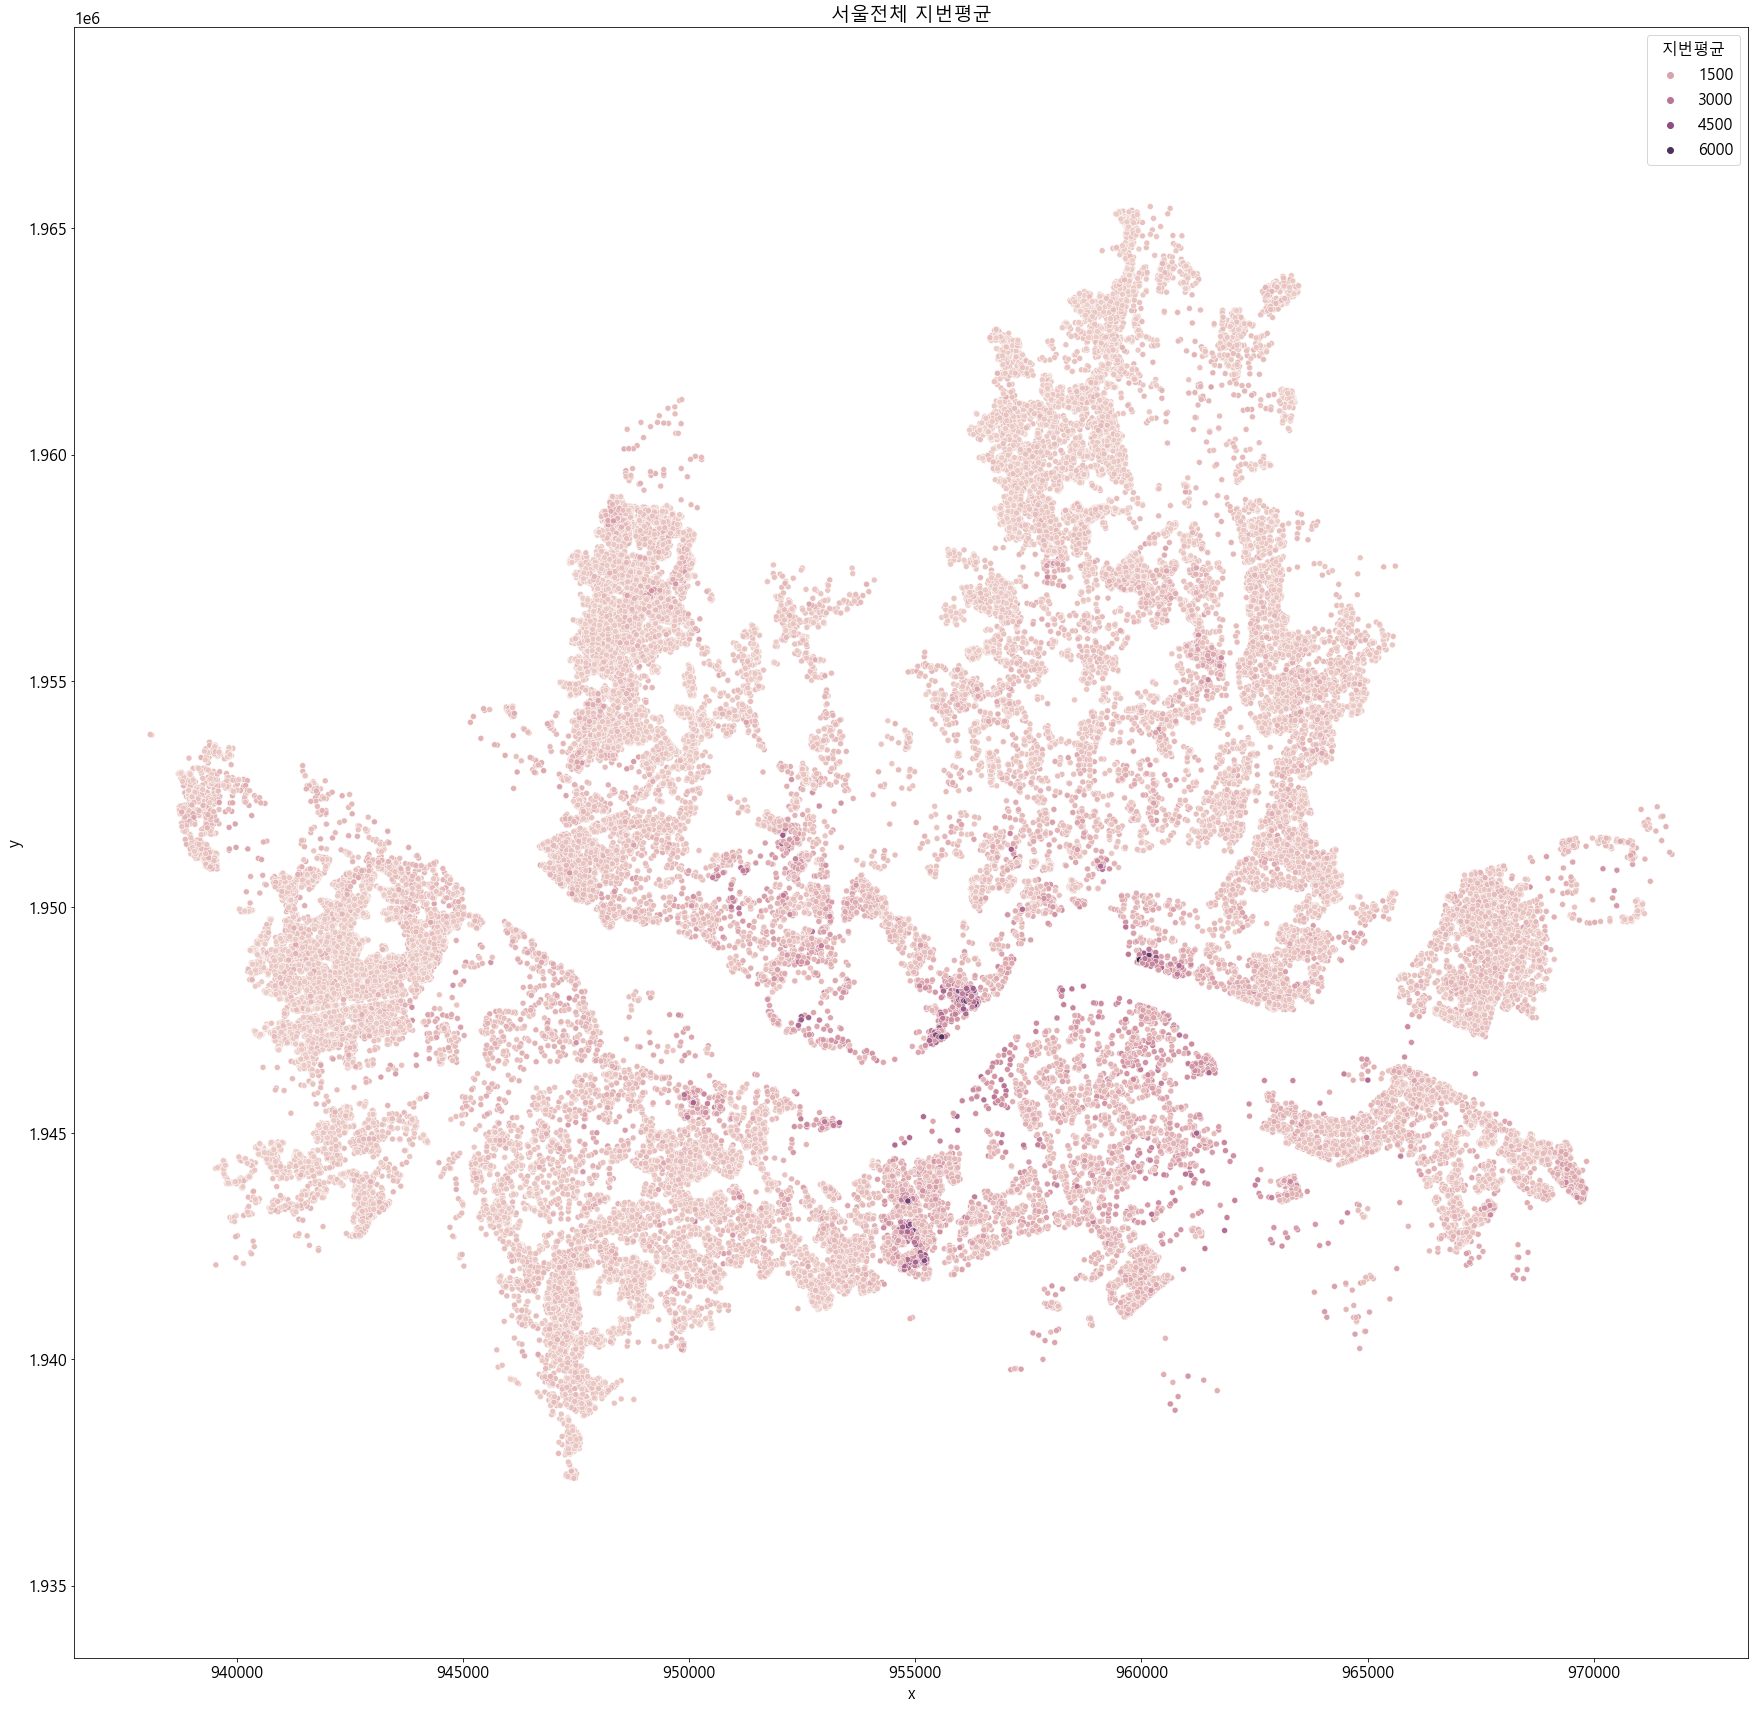

<Figure size 432x288 with 0 Axes>

In [33]:
f, ax = plt.subplots(figsize=(30,30))
plt.axis('equal')
plt.title('{} {}'.format('서울전체', '지번평균'))
sns.scatterplot(merge_df['x'], merge_df['y'], hue=merge_df['지번평균'])
plt.savefig(basedir + '{} {}.png'.format('서울전체', '지번평균'))

plt.show()
plt.clf()